## Analysis

In [416]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [345]:
df = pd.read_csv('.\\train.csv')
df_test = pd.read_csv('.\\test.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [68]:
for col in df:
  unq_vals = df[col].unique()
  num_unq_vals = len(unq_vals)
  
  if num_unq_vals < 12:
    print(f'{col:17} | {df[col].dtype} | {num_unq_vals:5} | {unq_vals}')
  else:
    print(f'{col:17} | {df[col].dtype} | {num_unq_vals:5} |')

PassengerId       | int64 |   891 |
Survived          | int64 |     2 | [0 1]
Pclass            | int64 |     3 | [3 1 2]
Name              | object |   891 |
Sex               | object |     2 | ['male' 'female']
Age               | float64 |    89 |
SibSp             | int64 |     7 | [1 0 3 4 2 5 8]
Parch             | int64 |     7 | [0 1 2 5 3 4 6]
Ticket            | object |   681 |
Fare              | float64 |   248 |
Cabin             | object |   148 |
Embarked          | object |     4 | ['S' 'C' 'Q' nan]


*Notes:*
- **PassengerId** and **Name** are unique for all passengers - must be removed.
- **Age**, **Cabin** and **Embarked** have null values for some passengers.
- **Embarked**, **Cabin**, **Ticket** and **Sex** are objects.

In [53]:
df = df.drop(['PassengerId', 'Name'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [69]:
df.isna().mean().sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [70]:
df['Cabin'].value_counts(normalize=True)

B96 B98        0.019608
G6             0.019608
C23 C25 C27    0.019608
C22 C26        0.014706
F33            0.014706
                 ...   
E34            0.004902
C7             0.004902
C54            0.004902
E36            0.004902
C148           0.004902
Name: Cabin, Length: 147, dtype: float64

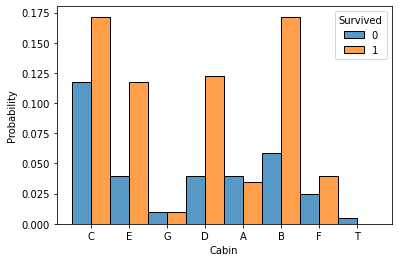

In [218]:
cabin = pd.DataFrame(df[~df['Cabin'].isna()])
cabin['Cabin'] = cabin['Cabin'].apply(lambda x: x[0] if x is not np.nan else np.nan)
cabin = cabin.filter(['Cabin', 'Survived'])

sns.histplot(data=cabin, x='Cabin', hue='Survived', stat='probability', multiple='dodge')
plt.show()

The correlation between the cabin and the probability of survival is not strong enough.

In [220]:
df['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [221]:
df['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [223]:
df['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

There is significant class imbalance for **Pclass** and **Embarked**.

In [236]:
df['Ticket'].value_counts().value_counts()

1    547
2     94
3     21
4     11
7      3
6      3
5      2
Name: Ticket, dtype: int64

Most **Ticket** values are unique.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

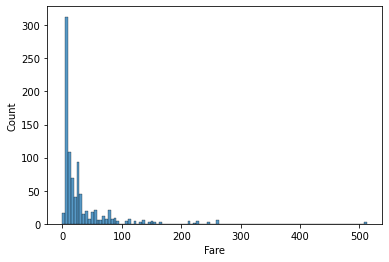

In [227]:
sns.histplot(df['Fare'])

**Fare** is skewed to the left.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

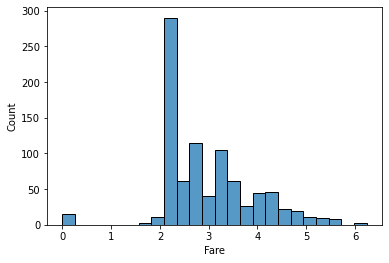

In [228]:
sns.histplot(np.log1p(df['Fare']))

## Preprocessing

In [381]:
def get_X_y(df):
  df = df.copy()

  df = df.drop(['Name', 'PassengerId','Cabin', 'Ticket'], axis=1)

  df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
  df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
  df['Fare'] = df['Fare'].fillna(df['Fare'].mode()[0])

  df['Fare'] = np.log1p(df['Fare'])

  dummies = pd.get_dummies(df.select_dtypes('object'))

  df = df.drop(df.select_dtypes('object').columns, axis=1)

  result = pd.concat([df, dummies], axis=1)

  if 'Survived' in df.columns:
    X = result.drop(['Survived'], axis=1)
    y = result['Survived']  
    return X, y

  else:
    return result, None

In [382]:
def preprocess_inputs(df):
  X, y = get_X_y(df)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
  
  return X_train, X_test, y_train, y_test

## Classification

### KNN

In [410]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

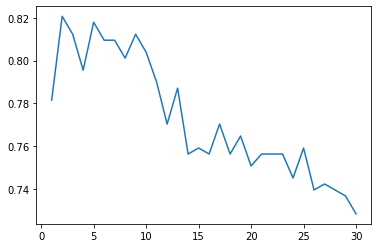

Accuracy: 0.8207282913165266


In [408]:
scores = []
ks = range(1, 31)

for k in ks:
  model = KNeighborsClassifier(k)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))

plt.plot(ks, scores)
plt.show()

k = scores.index(max(scores)) + 1

print(f'Accuracy: {max(scores)}')

##### Test

In [448]:
X_test, y = get_X_y(df_test)

model = KNeighborsClassifier(k)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': prediction})
output.to_csv('submission_knn.csv', index=False)

### Logistic Regression

In [444]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [445]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7899159663865546

##### Test

In [447]:
X_test, y = get_X_y(df_test)

model = KNeighborsClassifier(k)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': prediction})
output.to_csv('submission_logreg.csv', index=False)